## EMC

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

No PK limit available for this standard


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'EMC mask CISPR22_2008_Class_B'}, xlabel='frequency', ylabel='Mask [dBuV]'>)

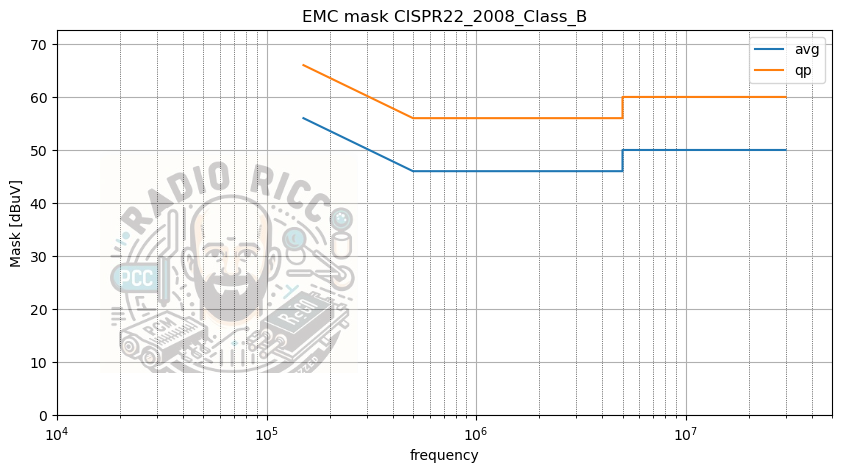

In [4]:
from emc.limits import CISPR22

emc_standard = CISPR22(emc_class='b')
emc_standard.plot_emc_mask()

No PK limit available for this standard


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'EMC mask ECE_R_10_2012'}, xlabel='frequency', ylabel='Mask [dBuV]'>)

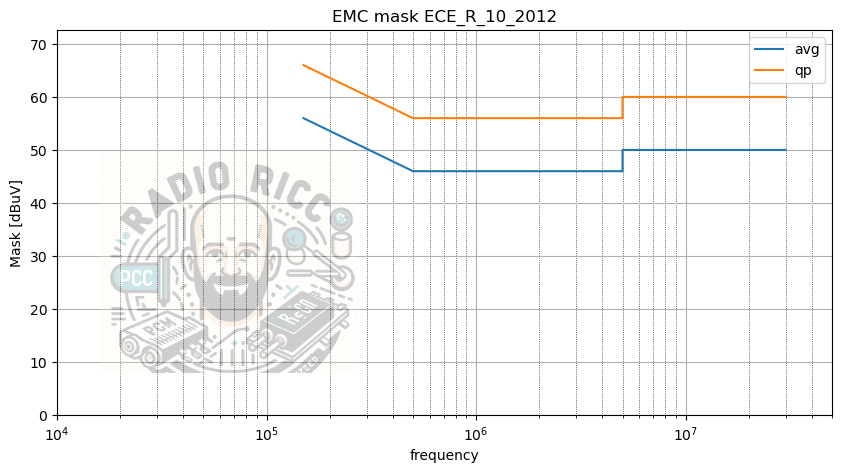

In [5]:
from emc.limits import ECE_R10_Conducted_AC_lines

emc_standard = ECE_R10_Conducted_AC_lines()
emc_standard.plot_emc_mask()


No PK limit available for this standard


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'EMC mask CISPR11_2015_100.0kVA_Group_1_Class_A'}, xlabel='frequency', ylabel='Mask [dBuV]'>)

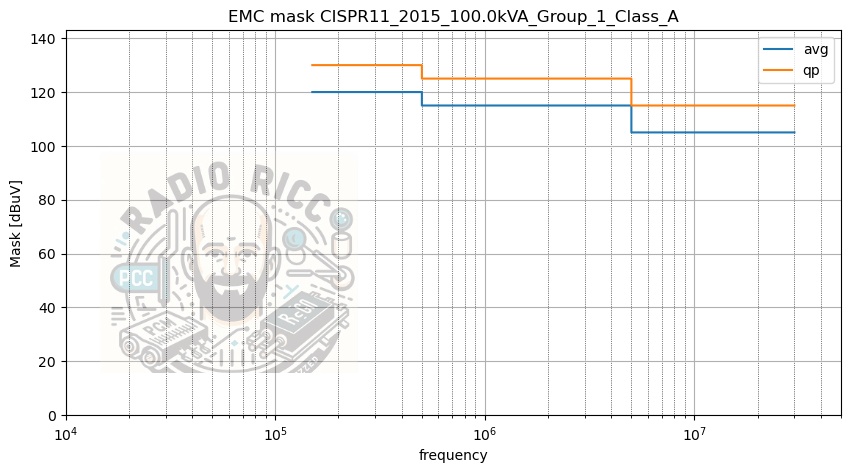

In [2]:
from emc.limits import CISPR11

emc_standard = CISPR11(group=1, power_rating=100e3, emc_class='a')
emc_standard.plot_emc_mask()

No PK limit available for this standard
No PK limit available for this standard
No PK limit available for this standard
No PK limit available for this standard


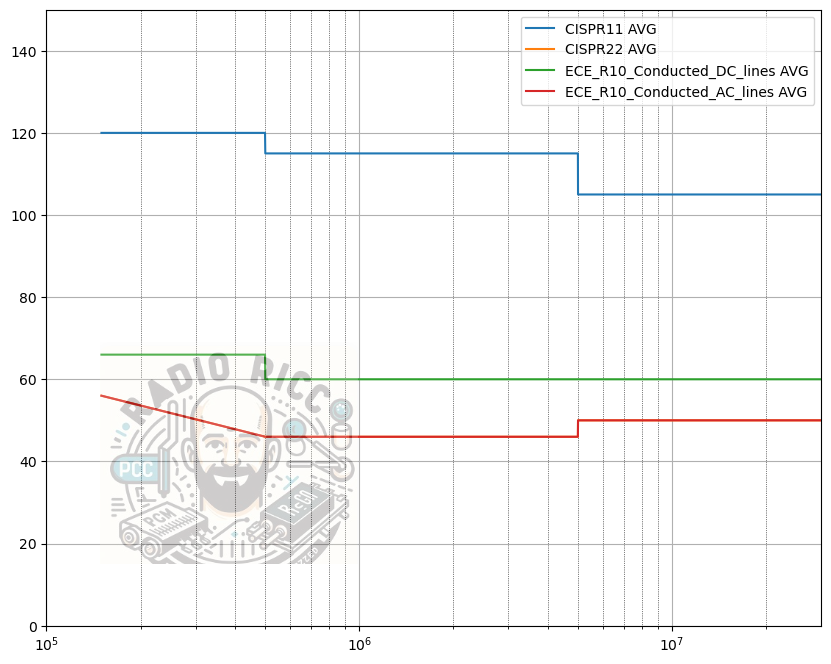

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from emc.limits import ECE_R10_Conducted_AC_lines, ECE_R10_Conducted_DC_lines, CISPR22, CISPR11

def calc_worst_case_emc_limits(fm, att_margin, standards, debug_plot=True):
    results = []
    for standard_class, params in standards:
        avg_base_lim, qp_base_lim, pk_base_lim, _, _, _ = standard_class(**params).interp_log(fm)
        results.append((avg_base_lim, qp_base_lim, pk_base_lim, standard_class.__name__))

    if debug_plot:
        fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
        for avg_base_lim, _, _, label in results:
            ax1.semilogx(fm, 20 * np.log10(np.abs(avg_base_lim)) + 120, label=f'{label} AVG')
        ax1.grid(True)
        ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax1.set_xlim([100e3, fm[-1]])
        ax1.set_ylim([0, 150])
        # Add logo to the plot in background middle
        logo = plt.imread('./logo.png')
        fig.figimage(logo, 100, 100, alpha=0.2)

        ax1.legend(loc='best')
        plt.show()

# Example usage
fm = np.arange(150e3, 30e6, 1e3)
standards = [
    (CISPR11, {'group':1, 'power_rating':100e3, 'emc_class':'a'}),
    (CISPR22, {'emc_class': 'b'}),
    (ECE_R10_Conducted_DC_lines, {}),
    (ECE_R10_Conducted_AC_lines, {})]

calc_worst_case_emc_limits(fm=fm, att_margin=0.0, standards=standards, debug_plot=True)